In [1]:
## load the packages

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hydrant.topology.geom as gm
import hydrant.topology.river_graph as rg
import subprocess
import os

In [2]:
# set the path to MERIT-Basins

In [3]:
# input paths
mb_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
rv_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
hl_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/coastal_hillslopes/'

# output paths
path_out = '/home/shg096/scratch/West/domain/'
if not os.path.isdir(path_out):
    os.makedirs(path_out)

In [4]:
# preparing the target pfaf areas for manupulation

In [5]:
pfafs = ['71']

# Define the file name templates with a placeholder *
cat_file_template = 'cat_pfaf_*_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'
riv_file_template = 'riv_pfaf_*_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'
hil_file_template = 'hillslope_*_clean.shp'


cat_files = []
riv_files = []
hil_files = []

for pafaf in pfafs:
    # Replace * with the current pafaf value
    cat_files.append(cat_file_template.replace('*', pafaf))
    riv_files.append(riv_file_template.replace('*', pafaf))
    hil_files.append(hil_file_template.replace('*', pafaf))

# reading in data and append
cat = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in cat_files])
riv = pd.concat([gpd.read_file(os.path.join(rv_path, f)) for f in riv_files])
hil = pd.concat([gpd.read_file(os.path.join(hl_path, f)) for f in hil_files])

# set the projection
cat.set_crs(epsg=4326, inplace=True, allow_override=True)
riv.set_crs(epsg=4326, inplace=True, allow_override=True)
hil.set_crs(epsg=4326, inplace=True, allow_override=True)


,FID,geometry
0,309,"POLYGON ((-80.40792 51.30042, -80.40792 51.301..."
1,310,"POLYGON ((-80.40792 51.30042, -80.40792 51.299..."
2,318,"POLYGON ((-80.29042 59.70125, -80.28958 59.701..."
3,321,"POLYGON ((-80.32042 59.80625, -80.31958 59.806..."
4,325,"POLYGON ((-80.48792 51.51708, -80.48708 51.517..."
...,...,...
1731,2117,"POLYGON ((-94.80792 59.88292, -94.80458 59.882..."
1732,2119,"POLYGON ((-94.80875 59.65792, -94.80708 59.657..."
1733,2120,"POLYGON ((-94.81042 59.65792, -94.80958 59.657..."
1734,3067,"POLYGON ((-108.54708 52.72625, -108.54625 52.7..."


In [6]:
cat =  gm.prepare_cat(
    cat,
    'COMID',
    cst = hil,
    cst_col_id= {'id':'COMID'},
)
cat = cat.drop(columns = ['FID'])
cat

,COMID,unitarea,geometry,hillslope
0,71000001,39.620826,"POLYGON ((-98.14542 60.06375, -98.13792 60.063...",0
1,71000002,99.276774,"MULTIPOLYGON (((-98.11958 60.19292, -98.11458 ...",0
2,71000003,63.957629,"MULTIPOLYGON (((-98.33375 60.03542, -98.33292 ...",0
3,71000004,16.746171,"MULTIPOLYGON (((-98.40125 60.05208, -98.40042 ...",0
4,71000005,5.993164,"POLYGON ((-98.43208 60.10708, -98.43125 60.107...",0
...,...,...,...,...
50682,71050683,0.060656,"POLYGON ((-94.80792 59.88292, -94.80458 59.882...",1
50683,71050684,0.008723,"POLYGON ((-94.80875 59.65792, -94.80708 59.657...",1
50684,71050685,0.004362,"POLYGON ((-94.81042 59.65792, -94.80958 59.657...",1
50685,71050686,10.810153,"POLYGON ((-108.54708 52.72625, -108.54625 52.7...",1


<AxesSubplot:>

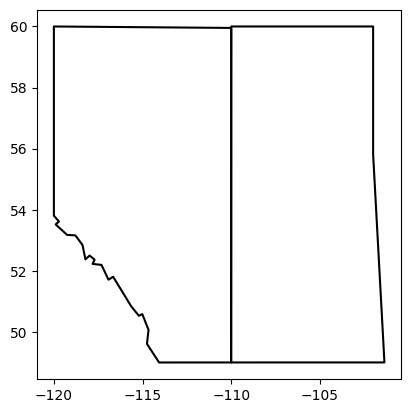

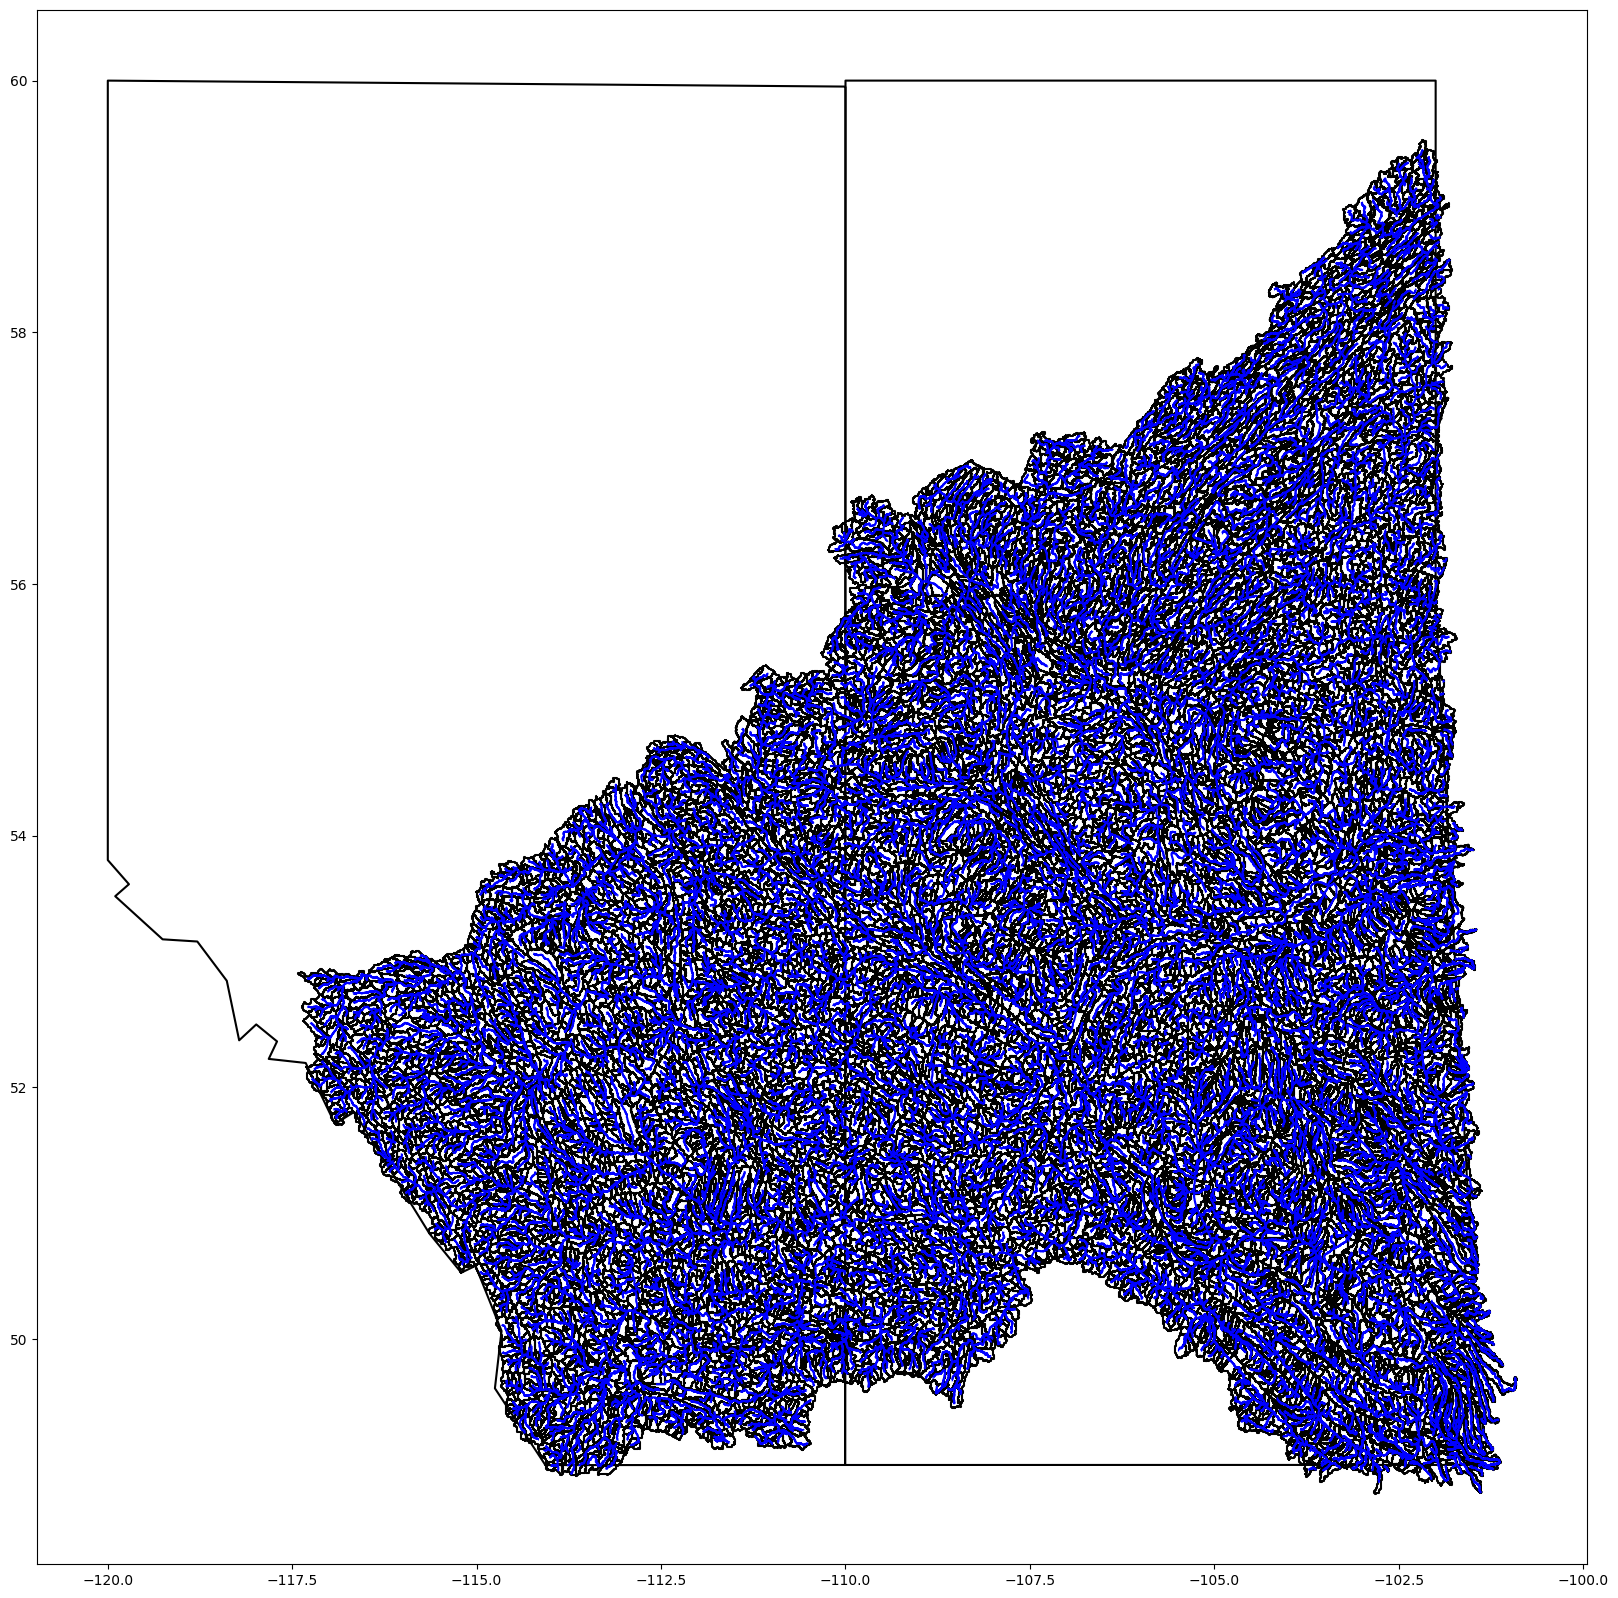

In [7]:
# Manupulate target shapefile if desired or exists (this is optional)
trg_shp = gpd.read_file('../../data/province/provinces.shp')
sel_pr = ['Quebec', 'New Brunswick', 'Nova Scotia', 'Prince Edward Island']
sel_pr = ['Nova Scotia', 'Prince Edward Island']
sel_pr = ['Alberta','Saskatchewan']
# subsetting `provinces` variable
trg_provinces = trg_shp.loc[trg_shp.PRENAME.isin(sel_pr)].copy().to_crs(epsg=4326)
trg_provinces.boundary.plot(color='k')

cat, riv = gm.intersect_topology(cat=cat,\
                                 cat_cols={'id':'COMID'},\
                                 riv=riv,\
                                 riv_cols={'id':'COMID', 'next_id':'NextDownID'},\
                                 shapefile=trg_provinces)

fig, ax = plt.subplots(figsize=(20,30))
trg_provinces.boundary.plot(ax=ax, color='k')
cat.boundary.plot(ax=ax,color='k')
riv.plot(ax=ax,color='blue')

In [9]:
cat

,COMID,unitarea,geometry,hillslope
24,71000025,53.969083,"POLYGON ((-101.98125 59.01292, -101.97708 59.0...",0
25,71000026,28.626667,"POLYGON ((-101.92208 59.09042, -101.91958 59.0...",0
26,71000027,63.282610,"POLYGON ((-102.01292 59.10792, -102.00958 59.1...",0
27,71000028,46.267718,"POLYGON ((-102.10042 59.09458, -102.09625 59.0...",0
28,71000029,8.981246,"POLYGON ((-102.24792 59.01875, -102.24708 59.0...",0
...,...,...,...,...
46999,71047000,35.651419,"POLYGON ((-102.66542 49.03875, -102.66375 49.0...",0
47002,71047003,53.271269,"POLYGON ((-114.00625 49.02542, -114.00542 49.0...",0
47005,71047006,96.682693,"POLYGON ((-101.91458 49.04792, -101.91042 49.0...",0
50685,71050686,10.810153,"POLYGON ((-108.54708 52.72625, -108.54625 52.7...",1


In [13]:
cat_slice = cat [cat['COMID'] == 71050687]
cat_slice

,COMID,unitarea,geometry,hillslope
50686,71050687,11.969199,"POLYGON ((-110.42958 52.02958, -110.42958 52.0...",1


In [8]:
import geopandas as gpd
import pandas as pd

from typing import (
    Optional,
    Dict,
    Tuple,
    Union,
    Sequence,
)

def prepare_riv(
    riv: gpd.GeoDataFrame,
    riv_cols: Dict[str, str],
    cat: gpd.GeoDataFrame,
    cat_cols: Dict[str, str],
    outlet_val: int = -9999,
    riv_na_val: int = 1,
    crs: int = 4326,
    *args,
    **kwargs,
) -> gpd.GeoDataFrame:
    '''Preparing the `river` object
    
    Parameters
    ----------
    riv: geopandas.GeoDataFrame
        The river network object containing river segments
    riv_cols: dict
        A dictionary containing 'id', 'next_id', keys and values 
        corresponding to the river segement IDs and their downstream
        river segments, respectively. Also, other keys includes 'slope',
        'length', 'length_direct'
    cat: geopandas.GeoDataFrame
        The catchment topology object derived from `prepare_cat`
        function
    cat_cols: dict
        A dictionary containing 'id', 'hillslope' keys and values
        corresponding to the catchment IDs and also the flag indicating
        whether the catchment is a coastal hillslope one (1) or not (0)
    outlet_val: int, optional [defaults to -9999]
        Value being assigned to the 'next_id' cell of the each
        river segments indicating the segment is an outlet for the network;
        before any subsetting, if any coastal hillslope segments exist, they
        will only be set to the outlet value.
    riv_na_val: int, optional [defaults to 1]
        An integer value filling the geopandas.GeoDataFrame `river` object
        to replace `NaN`
    crs: int, optional [defaults to 4326]
        The Coordination Reference System EPSG number
    
    Returns
    -------
    river: geopandas.GeoDataFrame
        The prepared river network topology GeoDataFrame object        
    '''
    # necessary definitions
    hillslope_id = cat_cols.get('hillslope')
    cat_col_id = cat_cols.get('id')
    cat_col_geom = cat_cols.get('geom')
    riv_col_id = riv_cols.get('id')
    riv_col_next_id = riv_cols.get('next_id')
    riv_col_len = riv_cols.get('length')
    riv_col_len_dir = riv_cols.get('length_direct')
    riv_col_slope = riv_cols.get('slope')
    
    print(cat_col_geom)
    
    # necessary assertions
    assert isinstance(riv, gpd.GeoDataFrame), "`riv` object must be of type geopandas.GeoDataFrame"
    assert isinstance(riv_cols, dict), "`riv_cols` object must be of type dict"
    assert isinstance(cat, gpd.GeoDataFrame), "`cat` object must be of type geopandas.GeoDataFrame"
    
    # `id` and `next_id` keys must be included in the `riv_cols` dictionary
    if not 'id' and 'next_id' in riv_cols:
        raise ValueError("`id` and `next_id` must be included in the `riv_cols` dictionary")
    
    # extract the hillslope column from `cat` and assign `id` as index
    hills = cat.set_index(cat_col_id)
    hills = hills[hillslope_id]
    
    # add the hillslope flag from `cat`
    # `cat` has necessary greater than or equal number of items than `riv`
    river = gpd.GeoDataFrame(riv.join(other=hills, on=riv_col_id, how='outer'), 
                             geometry=cat_col_geom)
    
    # resetting index of `river`
    river.reset_index(drop=True, inplace=True)
    
    # necessary columns being chosen for downcasting of dtypes
    # and other necessary assignments
    col_list = list(river.columns)
    print(col_list)
    print(cat_col_id, cat_col_geom)
    for col in [cat_col_id, cat_col_geom]:
        col_list.remove(col)
    
    # fill NAs with `riv_na_val` values in `rivers`
    river.loc[river[hillslope_id] == 1, col_list] = riv_na_val
    # assign `outlet_val` to the `hillslope_id` river segments
    river.loc[river[hillslope_id] == 1, riv_col_next_id] = outlet_val
    # fix cicular segemnts, in other words, those whose 'id' and
    # 'next_id's are the same
    river.loc[river[riv_col_id] == river[riv_col_next_id], riv_col_next_id] = outlet_val
    # fix zero and negative values for fields that are not acceptable
    river_sec = [riv_col_len, riv_col_len_dir, riv_col_slope]

    # remove possible `None` values from `river_sec`
    while None in river_sec:
        river_sec.remove(None)

    # creating `river_sec_df` 
    river_sec_df = river.loc[:, river_sec]
    river_sec_df.where(~(river_sec_df <= 0), riv_na_val, inplace=True)
    river_sec_df.where(~(river_sec_df.isnull()), riv_na_val, inplace=True)
    river.loc[:, river_sec] = river_sec_df
    
    
    # downcast dtype of necessary columns to integer, if possible
    fcols = river[col_list].select_dtypes('float').columns
    river[fcols] = river[fcols].apply(pd.to_numeric, downcast='integer')
    
    # sort based on `cat_col_id` and reset_index
    river.sort_values(by=riv_col_id, axis='index', inplace=True)
    river.reset_index(drop=True, inplace=True)
    
    # assign crs
    river.set_crs(epsg=crs, inplace=True)
    
    return river

riv = prepare_riv(riv,
    {'id': 'COMID', 'next_id': 'NextDownID',\
     'slope':'slope', 'lengthdir':'length_direct',\
     'length': 'length',
    },
    cat,
    {'id': 'COMID', 'hillslope': 'hillslope', 'geom':'geometry'})

geometry
['COMID', 'lengthkm', 'lengthdir', 'sinuosity', 'slope', 'uparea', 'order', 'strmDrop_t', 'slope_taud', 'NextDownID', 'maxup', 'up1', 'up2', 'up3', 'up4', 'geometry', 'hillslope']
COMID geometry


KeyError: "['length'] not in index"

In [ ]:
riv
ll

## Example-1 From West

In [ ]:
# data creation, Station ID, seg ID that accompany the station, Station name,
# and up flag meaning is the flow should be sum of upstream segmenets
# this can be created in a csv file and be read here.

# data = {
#     'Station ID': ['05BE004', '05BH004'],
#     'seg ID': [71028039, 71027942],
#     'Station name': [
#         'BOW RIVER NEAR SEEBE',
#         'BOW RIVER AT CALGARY'
#     ],
#     'up': [0, 0]
# }

data = {
    'Station ID': ['05BE004', '05BH004', '05BL004', '05CC002'],
    'seg ID': [71028039, 71027942, 71034975, 71022153],
    'Station name': [
        'BOW RIVER NEAR SEEBE',
        'BOW RIVER AT CALGARY',
        'HIGHWOOD RIVER BELOW LITTLE BOW CANAL',
        'RED DEER RIVER AT RED DEER'
    ],
    'up': [0, 0, 0, 0]
}

# Create a DataFrame from the dictionary
stations_seg_id = pd.DataFrame(data)

In [ ]:
# slice the domain for various stations and their seg ID
cat_slice, riv_slice = gm.intersect_topology(cat=cat,\
                                             cat_cols={'id':'COMID'},\
                                             riv=riv,\
                                             riv_cols={'id':'COMID', 'next_id':'NextDownID'},\
                                             outlet_id=list(stations_seg_id['seg ID']))


stations = gpd.read_file('../../data/stations_point/stations_point.gpkg')
stations_sliced = stations[stations['Station ID'].isin(list(stations_seg_id['Station ID']))]

In [ ]:
fig, ax = plt.subplots(figsize=(20,30))
riv_slice.plot(ax=ax, color='b')
cat_slice.boundary.plot(ax=ax, color='k')
stations_sliced.plot(ax=ax, color='r', markersize=200)

In [ ]:
cat_slice.to_file(path_out+'West_cat.shp')
riv_slice.to_file(path_out+'West_riv.shp')

In [ ]:
len(riv_slice)

## Example-2 From Great Lakes

In [ ]:
# data creation, Station ID, seg ID that accompany the station, Station name,
# and up flag meaning is the flow should be sum of upstream segmenets
# this can be created in a csv file and be read here.

data = {
    'Station ID': ['02HC013', '02HC018', '02EC011', '02HC024'],
    'seg ID': [72052687, 72052485, 72051928, 72055140],
    'Station name': [
        'HIGHLAND CREEK NEAR WEST HILL',
        'LYNDE CREEK NEAR WHITBY',
        'BEAVERTON RIVER NEAR BEAVERTON',
        'DON RIVER AT TODMORDEN'
    ],
    'up': [1, 1, 1, 1]
}

# Create a DataFrame from the dictionary
stations_seg_id = pd.DataFrame(data)

In [ ]:
# slice the domain for various stations and their seg ID
cat_slice, riv_slice = gm.intersect_topology(cat=cat,\
                                             cat_cols={'id':'COMID'},\
                                             riv=riv,\
                                             riv_cols={'id':'COMID', 'next_id':'NextDownID'},\
                                             outlet_id=list(stations_seg_id['seg ID']))


stations = gpd.read_file('../../data/stations_point/stations_point.gpkg')
stations_sliced = stations[stations['Station ID'].isin(list(stations_seg_id['Station ID']))]

In [ ]:
fig, ax = plt.subplots(figsize=(20,30))
riv_slice.plot(ax=ax, color='b')
cat_slice.boundary.plot(ax=ax, color='k')
stations_sliced.plot(ax=ax, color='r', markersize=200)

In [ ]:
# # Manupulate target shapefile if desired or exists (this is optional)
# trg_shp = gpd.read_file('../../data/province/provinces.shp')
# sel_pr = ['Quebec', 'New Brunswick', 'Nova Scotia', 'Prince Edward Island']
# sel_pr = ['Nova Scotia', 'Prince Edward Island']
# sel_pr = ['Alberta']
# # subsetting `provinces` variable
# trg_provinces = trg_shp.loc[trg_shp.PRENAME.isin(sel_pr)].copy().to_crs(epsg=4326)
# trg_provinces.boundary.plot(color='k')

In [ ]:
# cat, riv = gm.intersect_topology(cat=cat,\
#                                  cat_cols={'id':'COMID'},\
#                                  riv=riv,\
#                                  riv_cols={'id':'COMID', 'next_id':'NextDownID'},\
#                                  shapefile=trg_provinces)



In [ ]:
# fig, ax = plt.subplots(figsize=(20,30))
# trg_provinces.boundary.plot(ax=ax, color='k')
# cat.boundary.plot(ax=ax,color='k')
# riv.plot(ax=ax,color='blue')

In [ ]:
# def get_segment(riv,
#                 station_info,
#                 riv_col_seg,
#                 station_col_name = {'lat':'lat', 'lon':'lon', 'up_area':'up_area'},
#                 riv_col_up_area = None,
#                 riv_scale_up_area = None, # km2 to m2
#                 station_scale_up_area = None, # km2 to m2
#                 tolerance_for_area_diff = 0.05):

#     # 
#     if riv_col_up_area is not None:
#         if riv_scale_up_area is not None:
#             riv[riv_col_up_area] = riv[riv_col_up_area]*riv_scale_up_area

#     # rename station
#     station_info = station_info.rename(columns = station_col_name)
#     print(station_info)

#     if station_scale_up_area is not None:
#         station_info.loc ['up_area'] = station_info.loc ['up_area'] * station_scale_up_area

#     # 
#     riv['lat_centroid'] = riv.centroid.y
#     riv['lon_centroid'] = riv.centroid.x

#     station_info['seg_id'] = np.NaN
#     # loop over the station_info get the lat and lon and if available upstream area
#     for index, row in station_info.iterrows():
#         print(row)
#         riv_temp = riv.copy()
#         riv_temp['dist'] = 0
#         riv_temp['dist'] = (riv['lat_centroid']-row['lat'])**2 + (riv['lon_centroid']-row['lon'])**2
#         if (tolerance_for_area_diff is not None) and (riv_col_up_area is not None) and ('up_area' in station_col_name.keys()):
#             riv_temp['area_within'] = riv_temp[riv_col_up_area].abs()/row.up_area.item()
#             riv_temp = riv_temp [riv_temp ['area_within'] < tolerance_for_area_diff]
#         if not riv_temp.empty: # pass Nan
#             riv_temp = riv_temp.sort_values(by='dist')
#             riv_temp = riv_temp.reset_index(drop=True)
#             station_info['seg_id'].iloc[index] = riv_temp[riv_col_seg].iloc[0]

#     return station_info
        

In [ ]:
# station_info = pd.read_csv('../../data/stations/Bow_at_Calagary.csv')

# print(station_info)

# station_info = get_segment(riv,
#                 station_info,
#                 'COMID',
#                 station_col_name = {'Latitude':'lat', 'Longitude':'lon'},
#                 riv_col_up_area = None,
#                 riv_scale_up_area = None, # km2 to m2
#                 station_scale_up_area = None, # km2 to m2
#                 tolerance_for_area_diff = 0.05)